・word2vecのモデルをロード  
・ネットから集めたワードウルフのワードの組のリストをロード

In [128]:
from gensim.models import KeyedVectors
import json

# Word2Vecモデルのロード
model = KeyedVectors.load_word2vec_format('model_neo_nouns_only.bin', binary=True)

with open('word_pairs.json', 'r', encoding='utf-8') as f:
    word_pairs = json.load(f)
# print(word_pairs)
# print(type(word_pairs))

In [399]:
print(model)
model["スマホ"]

KeyedVectors<vector_size=300, 332251 keys>


array([ 2.8883e-01, -1.7858e-01, -5.9815e-02, -1.1837e-01, -1.0709e-01,
       -9.3459e-03,  4.4234e-01,  7.0604e-02,  2.1415e-01, -2.8036e-01,
       -2.3940e-01,  3.9671e-03, -5.5600e-01, -4.0794e-01,  5.5244e-01,
        9.1520e-02, -6.3684e-01, -2.3422e-01,  2.5764e-01, -1.4203e-01,
       -7.9798e-02,  4.1253e-01, -1.2501e-01, -6.7925e-01,  6.9590e-01,
        2.5913e-01, -1.2481e-01, -4.3058e-01,  3.9070e-01, -2.3775e-01,
        2.0625e-02, -2.9508e-01,  1.3218e-02,  4.8206e-01,  6.0642e-02,
       -1.7545e-02,  3.0706e-01, -6.2554e-02, -6.2791e-02, -1.7720e-01,
       -2.2980e-01, -9.6786e-02, -4.3064e-01, -3.4608e-01,  1.0987e-01,
        2.0125e-01, -1.8407e-02,  1.4926e-01, -5.1486e-01, -1.5026e-01,
        3.6849e-01,  9.2156e-02,  2.4802e-01, -2.6068e-01,  4.5202e-01,
        1.2735e-01,  1.6372e-01,  1.8696e-01, -1.8670e-02, -4.5358e-01,
       -3.6079e-01,  1.0368e-02, -4.3667e-01, -5.2504e-01, -3.3144e-01,
        4.0388e-01, -1.0910e-01,  4.4843e-01,  7.9444e-01, -1.09

・ネットからとってきた、ワードウルフのお題のペアのサンプルから、１つ目のワードと２つ目のワードの差をサンプルとして集める。  
・２つのワードのコサイン類似度を計算する。scoreが類似度　


In [129]:
# コサイン類似度のリストを生成
cosine_similarities = []
not_exist_word_lst = [] # モデルに含まれていない言葉
vector_diff = [] # ベクトルの差のリスト
for word1, word2 in word_pairs:
    if word1 in model.key_to_index and word2 in model.key_to_index:
        similarity = model.similarity(word1, word2)
        vector_diff.append(model[word1] - model[word2])
        cosine_similarities.append((word1, word2, similarity))
        # cosine_similarities.append(similarity)
    else:
        not_exist_word_lst.append((word1, word2))  # 単語がモデルにない場合
cosine_similarities

import pandas as pd 
df = pd.DataFrame(cosine_similarities, columns=["w1", "w2", "score"])

・サンプルのコサイン類似度の分布を描画する。

149


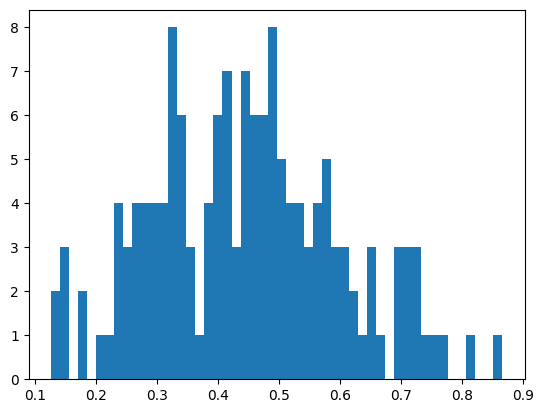

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
df = pd.DataFrame(cosine_similarities, columns=["w1", "w2", "score"])
plt.hist(df["score"], bins=50)
print(len(df["score"]))
m = np.array(vector_diff)


すべてのベクトルの要素の値を分布にする。

-0.0020698535
0.30253237


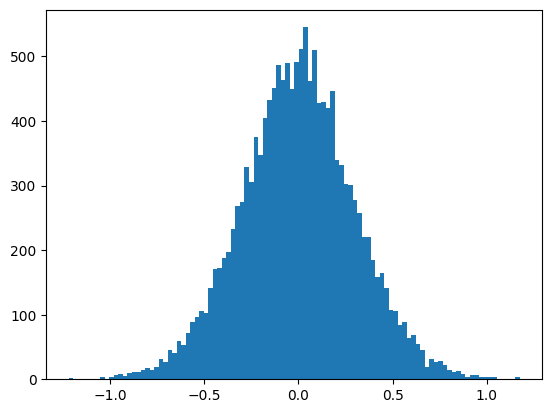

In [131]:
vector_diff
v = np.concatenate(vector_diff[0:50])
plt.hist(v,100)
print(np.mean(v))
print(np.std(v))

・シャピロ・ウィルク検定を行い正規分布かどうかを検定する。



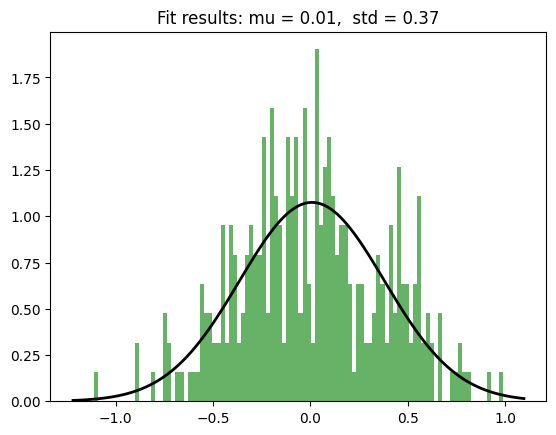

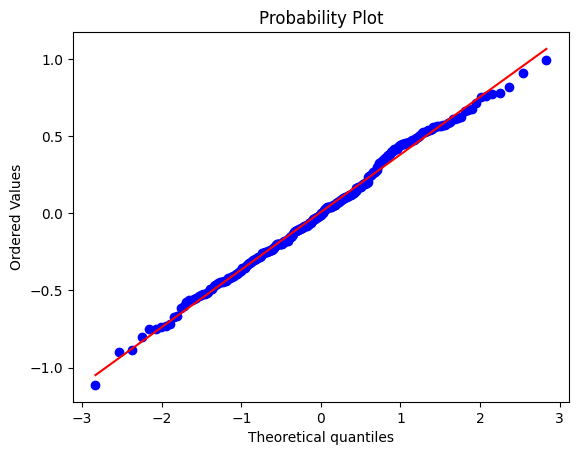

シャピロ・ウィルク検定: 統計量 = 0.9946375489234924, p値 = 0.3772789537906647
歪度: 0.018925325707453505, 尖度: -0.3171047523793429


In [132]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 視覚的な分析
# ヒストグラム
v = vector_diff[1]
plt.hist(v, bins=100, density=True, alpha=0.6, color='g')

# 正規分布曲線を重ねる
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(v), np.std(v))
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (np.mean(v), np.std(v))
plt.title(title)

plt.show()

# Q-Qプロット
stats.probplot(v, dist="norm", plot=plt)
plt.show()

# 統計的検定
# シャピロ・ウィルク検定
shapiro_test = stats.shapiro(v)
print(f"シャピロ・ウィルク検定: 統計量 = {shapiro_test[0]}, p値 = {shapiro_test[1]}")

# 歪度と尖度
skewness = stats.skew(v)
kurtosis = stats.kurtosis(v)
print(f"歪度: {skewness}, 尖度: {kurtosis}")

ベクトルの要素ごとに分布をとる。最初の１５個を表示している

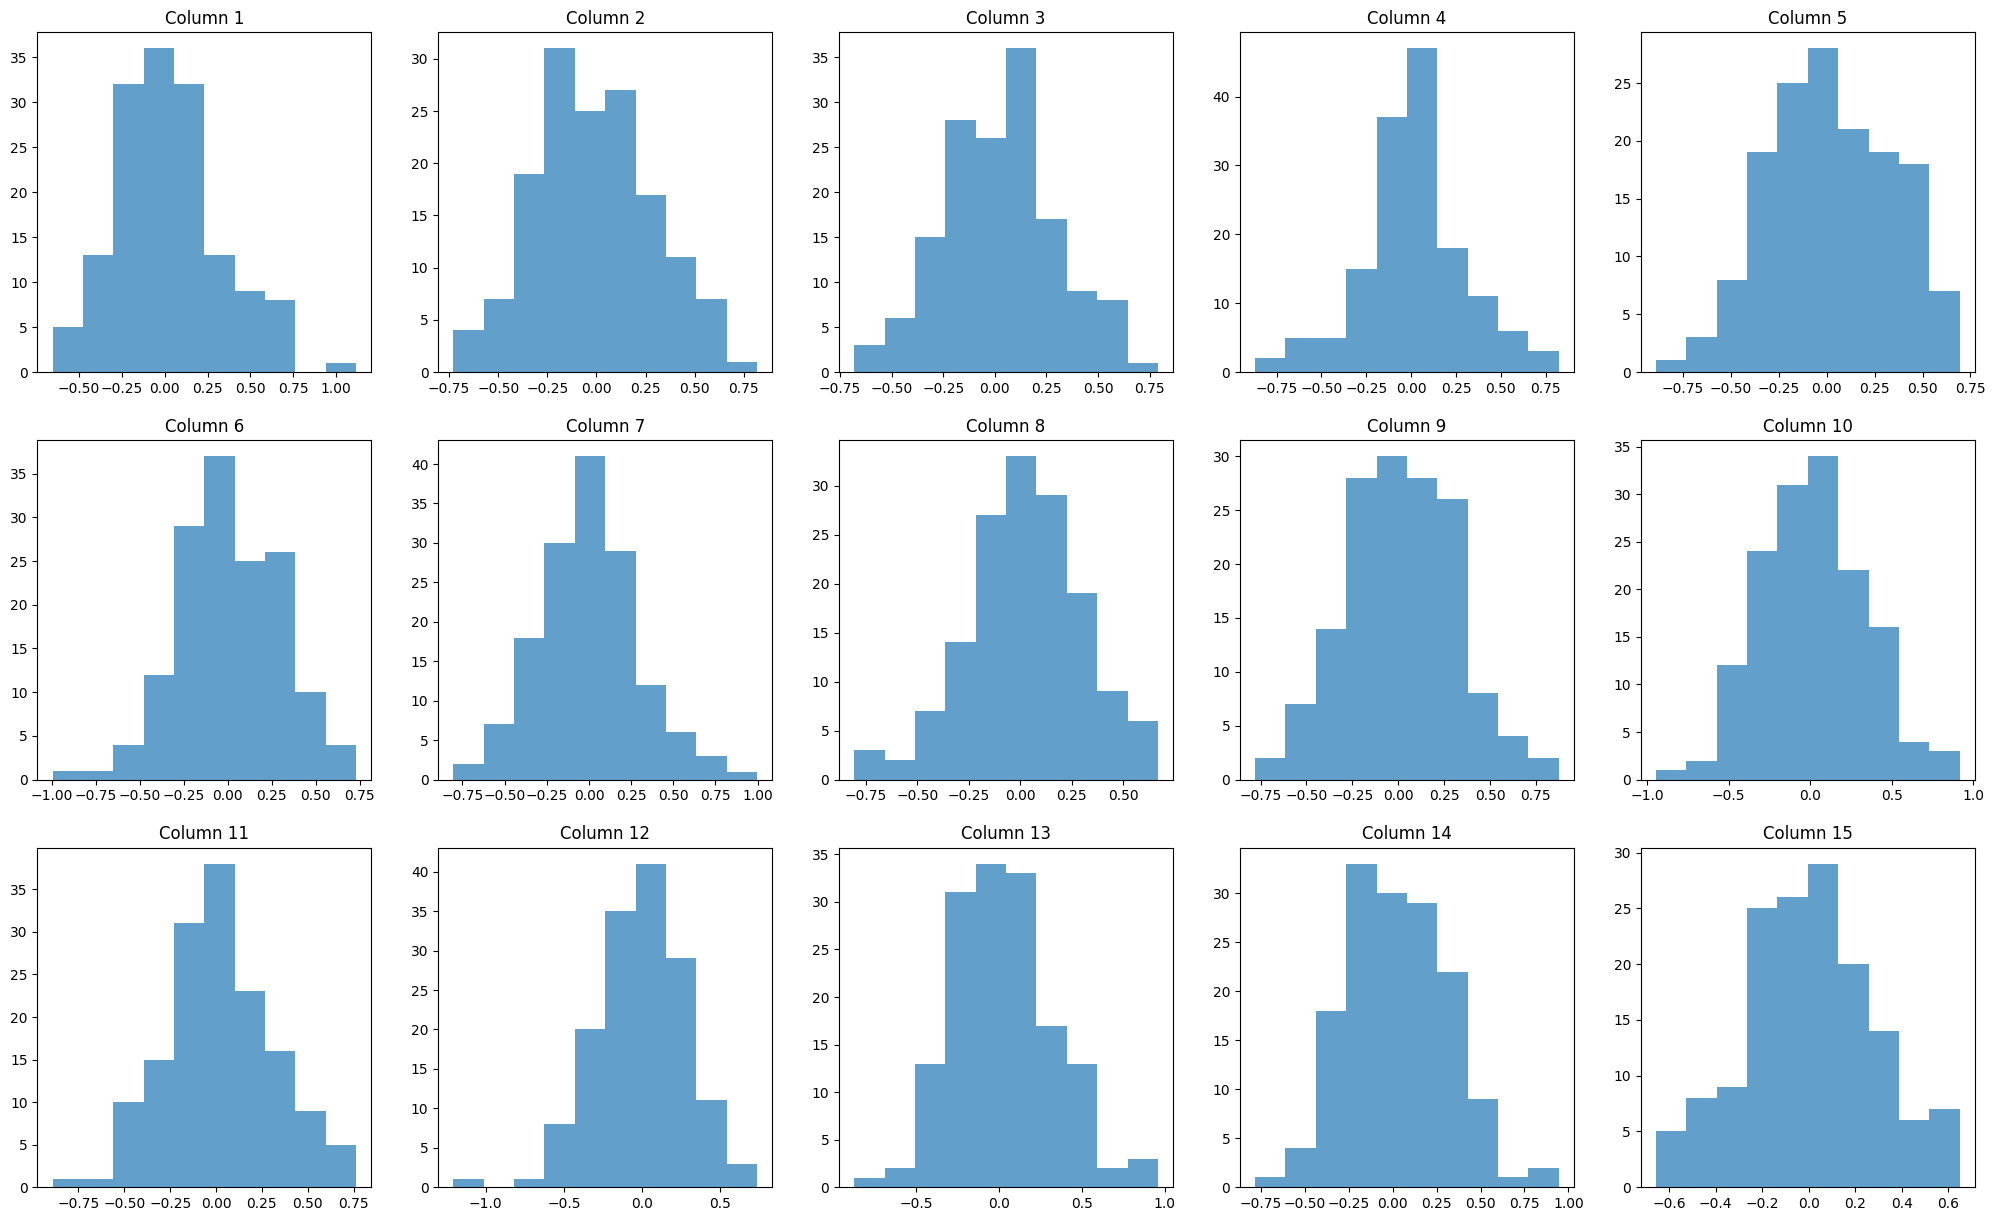

In [133]:
columns_to_plot = 15
plt.figure(figsize=(25,15))
for i in range(columns_to_plot):
    # plt.subplot(1, columns_to_plot, i + 1)
    plt.subplot(3,5,i+1)
    plt.hist(m[:, i], bins=10, alpha=0.7)
    plt.title(f'Column {i+1}')

In [134]:
mean = np.mean(vector_diff, axis=0)
mean

array([ 2.29902994e-02, -9.14334320e-03,  3.07264719e-02,  1.18552484e-02,
        1.84012745e-02,  1.12938145e-02, -4.92524635e-03,  2.65792813e-02,
        1.80865843e-02,  1.27234673e-02,  2.50669550e-02, -6.44791080e-03,
        2.63332035e-02,  2.93734185e-02, -1.89322408e-03,  1.28973611e-02,
        2.73457821e-02, -2.69628018e-02,  2.12008040e-02, -1.76061969e-02,
        2.78424937e-03,  3.56270298e-02, -2.32824441e-02, -2.84731910e-02,
        1.47355499e-03,  1.10603133e-02, -1.43116834e-02,  1.11081998e-03,
       -9.62366583e-04, -1.74945854e-02,  1.07101882e-02, -9.61152278e-03,
       -3.52405235e-02, -1.67033058e-02, -4.37863283e-02, -2.04342790e-03,
        1.96693055e-02, -1.79478489e-02, -1.37425521e-02,  7.46168289e-03,
       -1.96234193e-02, -9.31175798e-03, -7.61612644e-03, -3.28368740e-03,
       -4.95746806e-02,  3.97865623e-02,  3.05850687e-03, -2.93591130e-03,
       -7.20329257e-03, -9.10149794e-03,  1.61124691e-02, -1.31696686e-02,
       -4.02592905e-02, -

差のベクトルの要素の平均値をモデルからランダムにとった言葉のベクトルに足して、コサイン類似度が大きいものを見てみる。  
→類似度が一番大きいものは自分自身になってしまう。自分自身の類似度とあまりかわらないという結果になった。  
→分布から得られた値を使うことで改善するかどうか。試してみる。

In [383]:
import random
# モデルの語彙からランダムに単語を選択
random_word = random.choice(list(model.index_to_key))
random_word = "東京理科大学"
# print(random_word)
# 選択した単語のベクトルを取得
random_word_vec = model[random_word]
similar_word_vec = random_word_vec + mean

similar_words = model.similar_by_vector(similar_word_vec, topn=30)
closest_word = similar_words

print(f"元の単語: {random_word}")
print(f"単語と類似度(降順): ")
closest_word

元の単語: 東京理科大学
単語と類似度(降順): 


[('東京理科大学', 0.9972943067550659),
 ('諏訪東京理科大学', 0.8099240660667419),
 ('学校法人東京理科大学', 0.7398160696029663),
 ('工学部', 0.7312370538711548),
 ('埼玉大学', 0.726065456867218),
 ('理工学部', 0.717778742313385),
 ('東京電機大学', 0.7139262557029724),
 ('基礎工学部', 0.6921267509460449),
 ('東京大学', 0.6869888305664062),
 ('東京工業大学', 0.6838388442993164),
 ('千葉大学', 0.6835047006607056),
 ('前橋工科大学', 0.6825711727142334),
 ('東京大学大学院薬学系研究科', 0.6813459396362305),
 ('東京歯科大学', 0.6803171038627625),
 ('理学部', 0.67839515209198),
 ('芝浦工業大学', 0.6782432794570923),
 ('東京都立科学技術大学', 0.6779422163963318),
 ('工業大学', 0.6727958917617798),
 ('千葉工業大学', 0.6713972091674805),
 ('早稲田大学理工学部', 0.6704772710800171),
 ('日本大学理工学部', 0.6699783205986023),
 ('武蔵工業大学', 0.6673415899276733),
 ('基幹理工学部', 0.6669962406158447),
 ('慶應義塾大学', 0.6660324931144714),
 ('総合理工学研究科', 0.6649177670478821),
 ('理工学科', 0.6641008853912354),
 ('湘南工科大学', 0.6607635021209717),
 ('工学研究科', 0.6605284214019775),
 ('東京農工大学', 0.6585671901702881),
 ('松本歯科大学', 0.6574647426605225)]

ipadic辞書を使う。  
neologdも使いたいが、使用頻度が高いものを使えればいいがわからい

・サンプルの単語の名詞の分類を調べる

In [136]:
import ipadic
import MeCab
mecab = MeCab.Tagger(ipadic.MECAB_ARGS)

word_pairs_flatten = [w for t in word_pairs for w in t]

word_n = []
for w in word_pairs_flatten:
    node = mecab.parseToNode(w)
    while node:
        f = node.feature.split(",")
        if f[0] == "名詞":
            word_n.append(f)
        node = node.next

word_n

[['名詞', '一般', '*', '*', '*', '*', '炎', 'ホノオ', 'ホノオ'],
 ['名詞', '一般', '*', '*', '*', '*', '赤', 'アカ', 'アカ'],
 ['名詞', '一般', '*', '*', '*', '*', '運', 'ウン', 'ウン'],
 ['名詞', '一般', '*', '*', '*', '*', '便意', 'ベンイ', 'ベンイ'],
 ['名詞', '一般', '*', '*', '*', '*', 'コンビニ', 'コンビニ', 'コンビニ'],
 ['名詞', '一般', '*', '*', '*', '*', 'スーパー', 'スーパー', 'スーパー'],
 ['名詞', '一般', '*', '*', '*', '*', 'コンタクト', 'コンタクト', 'コンタクト'],
 ['名詞', '一般', '*', '*', '*', '*', 'サングラス', 'サングラス', 'サングラス'],
 ['名詞', '一般', '*', '*', '*', '*', 'サッカー', 'サッカー', 'サッカー'],
 ['名詞', '一般', '*', '*', '*', '*', 'ラグビー', 'ラグビー', 'ラグビー'],
 ['名詞', '一般', '*', '*', '*', '*', 'りす', 'リス', 'リス'],
 ['名詞', '一般', '*', '*', '*', '*', 'ハムスター', 'ハムスター', 'ハムスター'],
 ['名詞', '一般', '*', '*', '*', '*', 'ピアノ', 'ピアノ', 'ピアノ'],
 ['名詞', '一般', '*', '*', '*', '*', '教師', 'キョウシ', 'キョーシ'],
 ['名詞', '一般', '*', '*', '*', '*', '英語', 'エイゴ', 'エイゴ'],
 ['名詞', '一般', '*', '*', '*', '*', '教師', 'キョウシ', 'キョーシ'],
 ['名詞', '一般', '*', '*', '*', '*', 'ウォーター', 'ウォーター', 'ウォーター'],
 ['名詞', '一般', '*', '*', '

・コサイン類似度の分布から確率密度関数を作る。

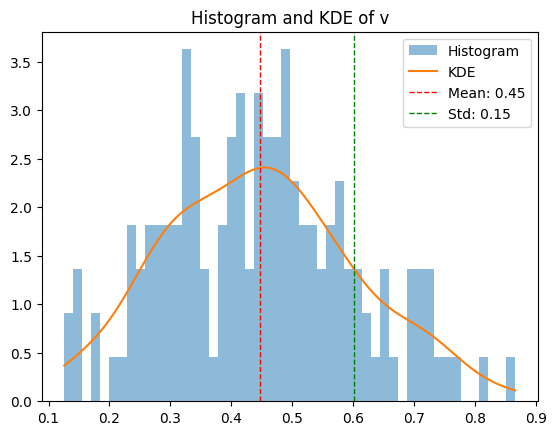

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

v = df["score"]
# KDE の計算
kde = gaussian_kde(v)

# プロットのための値範囲を設定（vの最小値と最大値の間）
x = np.linspace(v.min(), v.max(), 1000)

# KDEを用いて確率密度を計算
density = kde(x)

# ヒストグラムとKDEプロット
plt.hist(v, bins=50, density=True, alpha=0.5, label='Histogram')
plt.plot(x, density, label='KDE')

# 平均と標準偏差の表示
plt.axvline(np.mean(v), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(v):.2f}')
plt.axvline(np.mean(v) + np.std(v), color='green', linestyle='dashed', linewidth=1, label=f'Std: {np.std(v):.2f}')

# タイトルと凡例
plt.title('Histogram and KDE of v')
plt.legend()

# プロット表示
plt.show()


In [176]:
sample_values = kde.resample(1)
sample_values.flatten()[0]

0.2735578757328371

・すべてのベクトルの要素の分布から確率密度関数を作る。

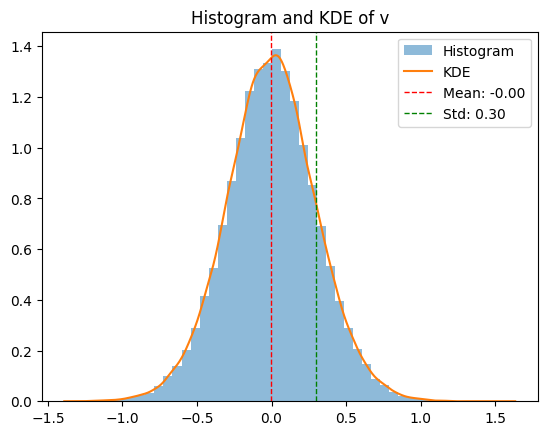

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

vector_diff
v = np.concatenate(vector_diff)

# KDE の計算
kde2 = gaussian_kde(v)

# プロットのための値範囲を設定（vの最小値と最大値の間）
x = np.linspace(v.min(), v.max(), 1000)

# KDEを用いて確率密度を計算
density = kde2(x)

# ヒストグラムとKDEプロット
plt.hist(v, bins=50, density=True, alpha=0.5, label='Histogram')
plt.plot(x, density, label='KDE')

# 平均と標準偏差の表示
plt.axvline(np.mean(v), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(v):.2f}')
plt.axvline(np.mean(v) + np.std(v), color='green', linestyle='dashed', linewidth=1, label=f'Std: {np.std(v):.2f}')

# タイトルと凡例
plt.title('Histogram and KDE of v')
plt.legend()

# プロット表示
plt.show()


In [172]:
sample_values = kde2.resample(300)
pre_vec_diff = sample_values.flatten()

・すべての要素から求めた分布を使って、差のベクトルを生成し、新しいベクトルを作成。作成したベクトルの中で、コサイン類似度が0.4くらいのものを取ってきてお題とする。

In [396]:
random_word = "時計"

In [397]:
sample_values = kde2.resample(300)
pre_vec_diff = sample_values.flatten()

import random
# モデルの語彙からランダムに単語を選択
# random_word = random.choice(list(model.index_to_key))

# print(random_word)
# 選択した単語のベクトルを取得
random_word_vec = model[random_word]
similar_word_vec = random_word_vec + pre_vec_diff

similar_words = model.similar_by_vector(similar_word_vec, topn=100)
closest_word = similar_words

print(f"元の単語: {random_word}")
# print(f"近い単語: {closest_word}")

closest_word = closest_word[1:]
x = 0.4  # 任意の値を指定
min_difference = float('inf')
nearest_word = None

for word, value in closest_word:
    difference = abs(value - x)
    if difference < min_difference:
        min_difference = difference
        nearest_word = word

print(f'最も近い単語は "{nearest_word}" です。')


元の単語: 時計
最も近い単語は "天文時計" です。


・日常で使う単語の頻度を知りたい。頻出の単語の方が、お題としてわかりやすい。ランダムで言葉を一つとってくるとほとんどの人がわからないような単語がほとんど。なので頻出の日本語を探す。